In [1]:
import matplotlib.pyplot as plt
from medmnist import INFO, PathMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

### Preparing the dataset

In [2]:
# Preparing the dataset
transform = transforms.ToTensor()
train_dataset = PathMNIST(split="train", download=True, transform=transform)

Using downloaded and verified file: C:\Users\Kinga\.medmnist\pathmnist.npz


### Dataset info

In [3]:
train_dataset.info

{'python_class': 'PathMNIST',
 'description': 'The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.',
 'url': 'https://zenodo.org/records/10519652/files/pathmnist.npz?download=1',
 'MD5': 'a8b06965200029087d5bd730944a56c1',
 'url_64': 'https://zenodo.org/records/10519652/files/pathmnist_64.npz?download=1',
 'MD5_64': '55aa9c1e0525abe5a6b9d8343a507616',
 'url_128': 'https://zenodo.org/records/10519652/files/pathmnist_128.npz?download=1',
 'MD5

### Available sizes

In [4]:
train_dataset.size, train_dataset.available_sizes

(28, [28, 64, 128, 224])

### Class labels

In [5]:
class_labels = train_dataset.info["label"]
class_labels

{'0': 'adipose',
 '1': 'background',
 '2': 'debris',
 '3': 'lymphocytes',
 '4': 'mucus',
 '5': 'smooth muscle',
 '6': 'normal colon mucosa',
 '7': 'cancer-associated stroma',
 '8': 'colorectal adenocarcinoma epithelium'}

### Displaying a data sample

C:\Users\Kinga\AppData\Local\Temp\ipykernel_19568\3207536601.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  numeric_label = int(train_dataset.labels[image_index])


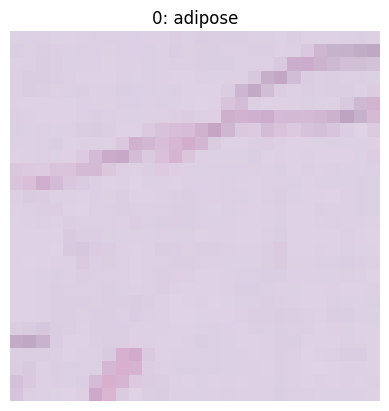

In [6]:
image_index = 0
numeric_label = int(train_dataset.labels[image_index])
label_name = train_dataset.info["label"][str(numeric_label)]

plt.title(f"{numeric_label}: {label_name}")
plt.imshow(train_dataset.imgs[image_index])
plt.axis("off")  
plt.show()

### Displaying images

In [7]:
def display_images_by_class(dataset, class_names):
    class_samples = {class_id: None for class_id in class_names.keys()}

    for img, label in dataset:
        label = str(int(label)) 
        if class_samples[label] is None:
            img = img.permute(1, 2, 0)  # channel last
            class_samples[label] = img 
        if all(sample is not None for sample in class_samples.values()):
            break

    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    axes = axes.flatten()
    for i, (class_id, img) in enumerate(class_samples.items()):
        ax = axes[i]
        ax.imshow(img.numpy())
        ax.set_title(class_names[class_id])
        ax.axis("off")

    for j in range(len(class_samples), 9):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

C:\Users\Kinga\AppData\Local\Temp\ipykernel_19568\2101380033.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = str(int(label))


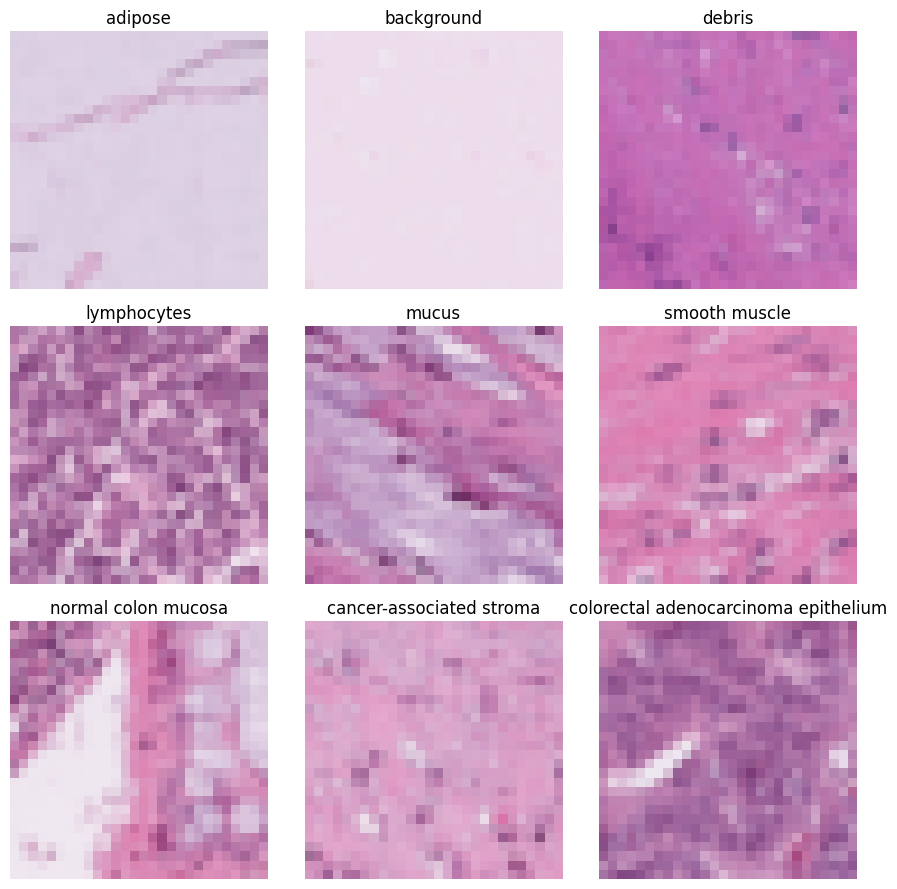

In [9]:
display_images_by_class(train_dataset, class_labels)